<a href="https://colab.research.google.com/github/TinKlo/kmean_rfm_explore/blob/master/rfm_sample__kemeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
https://github.com/DionysiosZelios/RFM_analysis/blob/master/sample-data.csv

In [ ]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import requests
%matplotlib inline

In [7]:
import requests
import pandas as pd
url = 'https://raw.githubusercontent.com/DionysiosZelios/RFM_analysis/master/sample-data.csv'
r = requests.get(url)
open('temp.csv', 'wb').write(r.content)
df = pd.read_csv('temp.csv')
orders = df

In [8]:
import datetime
testeddate = '2014/12/31'
NOW = datetime.datetime.strptime(testeddate,'%Y/%m/%d')

In [9]:
# Convert the date_placed column into datetime

orders['order_date'] = pd.to_datetime(orders['order_date'])

In [10]:
rfmTable = orders.groupby('customer').agg({'order_date': lambda x: (NOW - x.max()), # Recency
                                        'order_id': lambda x: len(x),               # Frequency
                                        'grand_total': lambda x: x.sum()})          # Monetary Value

rfmTable.rename(columns={'order_date': 'recency', 
                         'order_id': 'frequency', 
                         'grand_total': 'monetary_value'}, inplace=True)

In [11]:
# Converting the time delta to days instead of including the term 'days' in the actual column.

rfmTable['recency'] = rfmTable['recency'].astype('timedelta64[D]')

In [12]:
# Checking the results

rfmTable.head()# Checking the results

rfmTable.head()

,recency,frequency,monetary_value
customer,,,
Aaron Bergman,415.0,3,887.0
Aaron Hawkins,12.0,7,1744.0
Aaron Smayling,88.0,7,3050.0
Adam Bellavance,54.0,8,7756.0
Adam Hart,34.0,10,3249.0


In [13]:
aaron = orders[orders['customer']=='Aaron Bergman']
aaron

,order_date,order_id,customer,grand_total
624,2011-02-19,CA-2011-152905,Aaron Bergman,13.0
665,2011-03-07,CA-2011-156587,Aaron Bergman,310.0
2336,2013-11-11,CA-2013-140935,Aaron Bergman,564.0


In [14]:
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles

,recency,frequency,monetary_value
0.25,30.0,5.0,1145.0
0.50,75.0,6.0,2257.0
0.75,183.0,8.0,3784.0


In [15]:
quantiles = quantiles.to_dict()
quantiles

{'frequency': {0.25: 5.0, 0.5: 6.0, 0.75: 8.0},
 'monetary_value': {0.25: 1145.0, 0.5: 2257.0, 0.75: 3784.0},
 'recency': {0.25: 30.0, 0.5: 75.0, 0.75: 183.0}}

In [16]:
rfmSegmentation = rfmTable

In [17]:
# Arguments (x = value, p = recency, d = monetary_value, frequency, k = quartiles dict)

def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
# --------------------------------------------------------------------------------------------------------------------------#    


# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)

def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [18]:
rfmSegmentation['R_Quartile'] = rfmSegmentation['recency'].apply(RClass, args=('recency',quantiles,))
rfmSegmentation['F_Quartile'] = rfmSegmentation['frequency'].apply(FMClass, args=('frequency',quantiles,))
rfmSegmentation['M_Quartile'] = rfmSegmentation['monetary_value'].apply(FMClass, args=('monetary_value',quantiles,))

In [19]:
rfmSegmentation['RFMClass'] = rfmSegmentation.R_Quartile.map(str) \
                            + rfmSegmentation.F_Quartile.map(str) \
                            + rfmSegmentation.M_Quartile.map(str)

In [20]:
rfmSegmentation.head()


,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer,,,,,,,
Aaron Bergman,415.0,3,887.0,4,4,4,444
Aaron Hawkins,12.0,7,1744.0,1,2,3,123
Aaron Smayling,88.0,7,3050.0,3,2,2,322
Adam Bellavance,54.0,8,7756.0,2,2,1,221
Adam Hart,34.0,10,3249.0,2,1,2,212


In [22]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb

%matplotlib inline

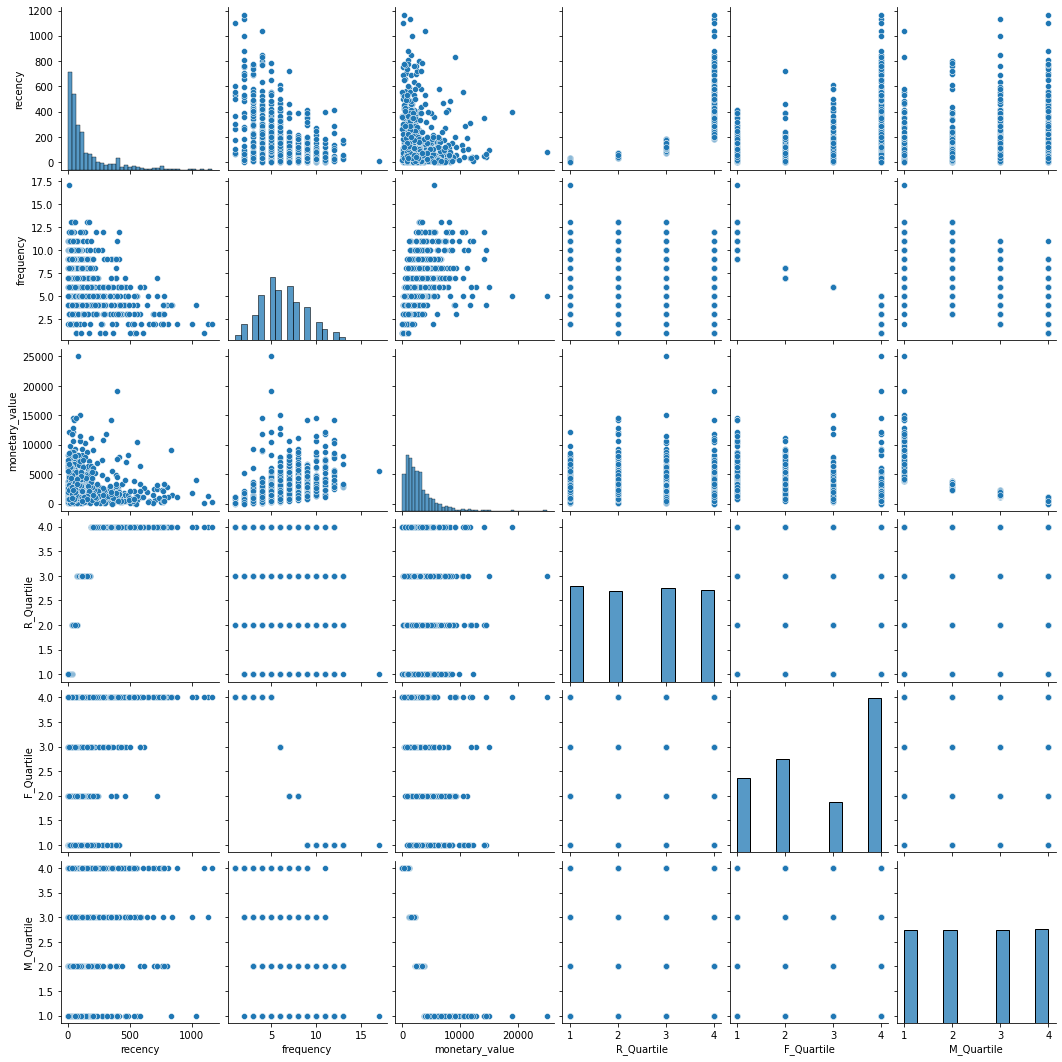

In [23]:
df = rfmSegmentation
sb.pairplot(df)


In [24]:
from sklearn.cluster import KMeans


In [29]:
X = np.array(df)

In [30]:
kmeans = KMeans(n_clusters=3, random_state=0)


In [31]:
X

array([[415.0, 3, 887.0, ..., 4, 4, '444'],
       [12.0, 7, 1744.0, ..., 2, 3, '123'],
       [88.0, 7, 3050.0, ..., 2, 2, '322'],
       ...,
       [4.0, 5, 5455.0, ..., 4, 1, '141'],
       [54.0, 13, 8027.0, ..., 1, 1, '211'],
       [202.0, 5, 1494.0, ..., 4, 3, '443']], dtype=object)

In [32]:
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [33]:
kmeans.labels_

array([0, 0, 2, 1, 2, 2, 1, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 1, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1,
       2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2,
       1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2,
       2, 2, 1, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 0, 2, 0,
       0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 1, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0,

In [34]:
df['K-classes'] = kmeans.labels_


In [35]:
df

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass,K-classes
customer,,,,,,,,
Aaron Bergman,415.0,3,887.0,4,4,4,444,0
Aaron Hawkins,12.0,7,1744.0,1,2,3,123,0
Aaron Smayling,88.0,7,3050.0,3,2,2,322,2
Adam Bellavance,54.0,8,7756.0,2,2,1,221,1
Adam Hart,34.0,10,3249.0,2,1,2,212,2
...,...,...,...,...,...,...,...,...
Xylona Preis,43.0,11,2375.0,2,1,2,212,0
Yana Sorensen,9.0,8,6721.0,1,2,1,121,2
Yoseph Carroll,4.0,5,5455.0,1,4,1,141,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


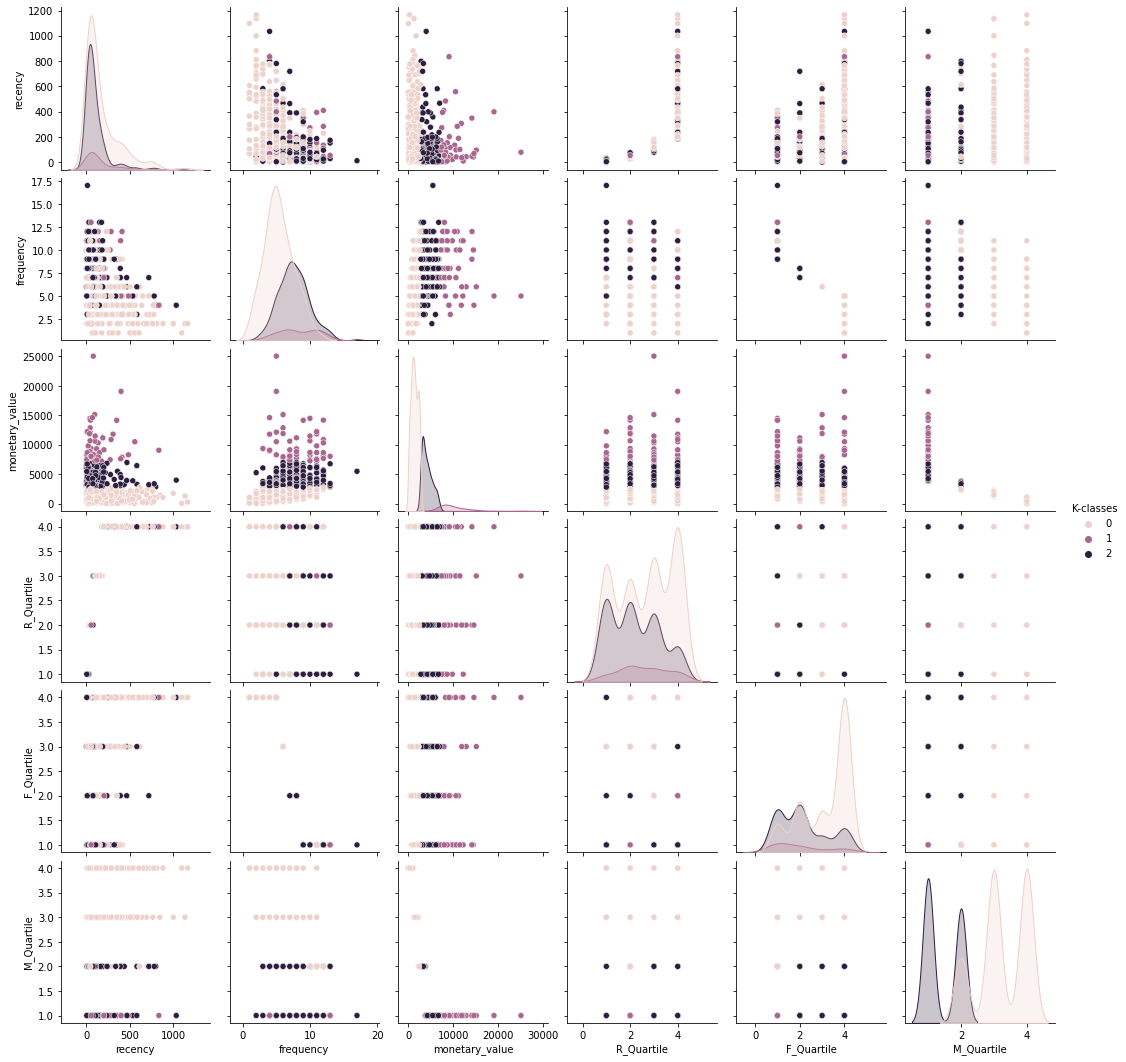

In [36]:
sb.pairplot(df,'K-classes')
